## filtrado

In [1]:
from obspy import read, read_inventory,UTCDateTime
from obspy.geodetics.base import calc_vincenty_inverse, locations2degrees
from obspy.taup.tau import TauPyModel
import obspy
import os
import numpy as np
%matplotlib inline

In [2]:
## cargamos las carpetas asi, pero luego en la interfaz sera automatico
ruta = os.getcwd()
ruta_w = ruta + "/"+"datos/FIJI ISLANDS REGION2018-8-19/waveforms"
ruta_s = ruta + "/"+"datos/FIJI ISLANDS REGION2018-8-19/stations"
ruta_w = ruta_w.replace("/","\\")

In [3]:
#leemos los archivos waveforms
print(ruta_w)
st = read(ruta_w+"\\*.mseed")

D:\Daniel\Documents\GitHub\Proyecto-Python\datos\FIJI ISLANDS REGION2018-8-19\waveforms


In [4]:
#leemos los xml
XML = os.listdir(ruta_s)
XML = sorted(XML)

In [5]:
c = 0
# un filtro para frecuencias muy altas y bajas
pre_filt = [0.001, 0.005, 10, 20]
dist = []
az = []
baz = []
canal = []
great_circle = []
arrivals = []
taup = TauPyModel()

In [6]:
st.traces[0].__dict__

{'stats':          network: AU
         station: KNRA
        location: 00
         channel: BHZ
       starttime: 2018-08-19T00:18:40.675000Z
         endtime: 2018-08-19T01:19:40.650000Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 146400
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 600, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 307200}),
 'data': array([ 2219,  2245,  2259, ..., 14253, 14232, 14208])}

In [6]:
ruta_w = ruta_w.replace("waveforms","info.txt")
archivo = open(ruta_w)
array =[]
for element in archivo:
    array.append(element.replace("\n",""))
#lat
#lon
#time

In [7]:
lat_e = float(array[0])
lon_e = float(array[1])
time = UTCDateTime(array[2])

## Remove Respuesta Instrumento

In [8]:
ruta_w =  ruta_w.replace("info.txt","stations")
print(ruta_w)
os.chdir(ruta_w)

for resp in XML:
    inv = read_inventory(str(resp))
    datachannel = inv.get_contents()
    channel = datachannel['channels']
    datacoor = inv.get_coordinates(channel[0], time)
    coords = [datacoor['latitude'], datacoor['longitude'], datacoor['local_depth']]
    [disti, azi, bazi] = calc_vincenty_inverse(
        lat_e, lon_e, coords[0], coords[1])
    greatcirc = locations2degrees(lat_e, lon_e, coords[0], coords[1])
    dist.append(disti)
    az.append(azi)
    baz.append(bazi)
    canal.append(channel[0])
    bandera = True
    i=0
    for element in inv.get_response(inv.get_contents()["channels"][0],time).__dict__['response_stages']:
        if (type(element) is obspy.core.inventory.response.ResponseStage):
            i+=1
        if(i>1):
            bandera = False
    if(bandera):
        st[c].remove_response(inventory=inv, pre_filt=pre_filt,output="VEL", plot=False)
    c += 1


D:\Daniel\Documents\GitHub\Proyecto-Python\datos\FIJI ISLANDS REGION2018-8-19\stations


C:\Users\Daniel\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


## filtrar para periodio onda P

In [11]:
c=0
ruta_w =  ruta_w.replace("info.txt","stations")
print(ruta_w)
os.chdir(ruta_w)
os.chdir(ruta_w)
for resp in XML:
    inv = read_inventory(str(resp))
    datachannel = inv.get_contents()
    channel = datachannel['channels']
    datacoor = inv.get_coordinates(channel[0], time)
    coords = [datacoor['latitude'], datacoor['longitude'], datacoor['local_depth']]
    [disti, azi, bazi] = calc_vincenty_inverse(
        lat_e, lon_e, coords[0], coords[1])
    greatcirc = locations2degrees(lat_e, lon_e, coords[0], coords[1])
    dist.append(disti)
    az.append(azi)
    baz.append(bazi)
    canal.append(channel[0])
    bandera = True
    i=0
    for element in inv.get_response(inv.get_contents()["channels"][0],time).__dict__['response_stages']:
    
        if (type(element) is obspy.core.inventory.response.ResponseStage):
            i+=1
        if(i>1):
            bandera = False
    if(bandera):
        st[c].filter('lowpass', freq=0.2, corners=2, zerophase=True)
    c += 1

D:\Daniel\Documents\GitHub\Proyecto-Python\datos\FIJI ISLANDS REGION2018-8-19\stations


## Graficar 

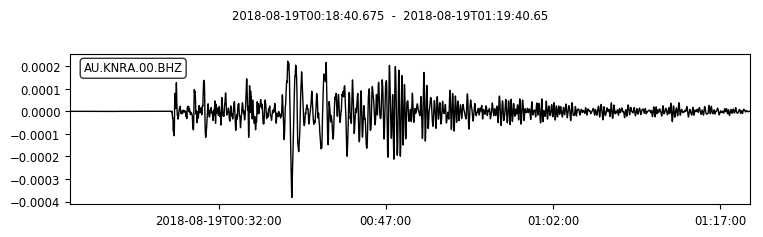

In [12]:
tam = np.size(st)
st[0].plot()